## Table of contents
- [1 - Problem Statement](#1)
- [2 - What spells success for this project](#2)
- [3 - Feature Engineering/Data Preprocessing](#3)
- [3.1 - Feature selection](#3.1)
- [4 - ML Modeling](#4)
- [5 - Hyper parameter optimization](#5)

<a name='1'></a>
## Problem statement
**Playhouse Communication is one of Nigeria's leading digital marketing agencies. They combine design and media planning with cutting-edge tech solutions to reimagine what marketing is all about. Their client roster is a mix of global juggernauts and nimble SMEs, each redefining their sectors.**

**Playhouse Communication Ltd. is eager to see the innovative solutions that the researcher will bring to the table**

<a name='2'></a>
## What spells success for this project
- create new and more important features
- Build more than 3 machine learning models that can predict the best network 
- identify the best model for real life production
- Deploy the model for real life usage or production.

<a name='3'></a>
## Feature engineering/Data preprocessing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBRFClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

In [2]:
#read in the data
data= pd.read_csv('cleaned_data_for_ml_modeling.csv')
data.head(3)

,Unnamed: 0,Date,Network,Post Type,Content Type,Profile,Sent by,Post,platform,Impressions,...,Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Poll Votes
0,0,12/17/2022 5:08 pm,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,"We celebrated recently with Novare, one of our...",facebook,525.0,...,416.44,0.0,975.0,975.0,0.0,263.0,62.0,19.0,0.0,653.0
1,1,5/4/2019 10:01 am,Facebook,Post,Photo,Stanbic IBTC,,N5k can get you started today. Call 01 280 126...,facebook,525.0,...,416.44,0.0,149.0,149.0,0.0,65.0,36.0,21.0,0.0,653.0
2,2,6/2/2020 9:00 pm,Facebook,Post,Photo,Stanbic IBTC,,Still not sure whether to invest in the FGN Bo...,facebook,525.0,...,416.44,0.0,149.0,149.0,0.0,65.0,36.0,21.0,0.0,653.0


In [3]:
data=data.drop(columns=['Date','Profile','Sent by','Post Type','Post'],axis=1)
data.shape

(36092, 105)

In [4]:
#check for missing values
data.isnull().sum()

Unnamed: 0                        0
Network                           0
Content Type                      0
platform                          0
Impressions                       0
                                 ..
Unique 10-Second Video Views      0
Unique Full Video Views           0
Unique Organic 95% Video Views    0
Unique Paid 95% Video Views       0
Poll Votes                        0
Length: 105, dtype: int64

In [5]:
#check for duplicates
data.duplicated().sum()

0

In [6]:
#drop and check for duplictes again
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [7]:
data.dtypes

Unnamed: 0                          int64
Network                            object
Content Type                       object
platform                           object
Impressions                       float64
                                   ...   
Unique 10-Second Video Views      float64
Unique Full Video Views           float64
Unique Organic 95% Video Views    float64
Unique Paid 95% Video Views       float64
Poll Votes                        float64
Length: 105, dtype: object

In [8]:
obj_data=data.select_dtypes(exclude=[np.number])
obj_data.columns

Index(['Network', 'Content Type', 'platform'], dtype='object')

In [9]:
data=data.drop(columns=['platform'],axis=1)

In [10]:
data.head(2)

,Unnamed: 0,Network,Content Type,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,...,Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Poll Votes
0,0,Facebook,Video,525.0,525.0,5.0,0.0,0.0,0.0,0.0,...,416.44,0.0,975.0,975.0,0.0,263.0,62.0,19.0,0.0,653.0
1,1,Facebook,Photo,525.0,525.0,44.0,0.0,0.0,0.0,0.0,...,416.44,0.0,149.0,149.0,0.0,65.0,36.0,21.0,0.0,653.0


In [11]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [12]:
for i,v in enumerate(data.columns):
    print(i,v)

0 Network
1 Content Type
2 Impressions
3 Organic Impressions
4 Viral Impressions
5 Non-viral Impressions
6 Paid Impressions
7 Fan Impressions
8 Fan Organic Impressions
9 Fan Paid Impressions
10 Non-fan Impressions
11 Non-fan Organic Impressions
12 Non-fan Paid Impressions
13 Reach
14 Organic Reach
15 Viral Reach
16 Non-viral Reach
17 Paid Reach
18 Fan Reach
19 Fan Paid Reach
20 Potential Reach
21 Engagements
22 Reactions
23 Likes
24 Love Reactions
25 Haha Reactions
26 Wow Reactions
27 Sad Reactions
28 Angry Reactions
29 Comments
30 Shares
31 Saves
32 Post Link Clicks
33 Other Post Clicks
34 Post Clicks (All)
35 Post Media Clicks
36 Post Hashtag Clicks
37 Post Detail Expand Clicks
38 Profile Clicks
39 Post Photo View Clicks
40 Post Video Play Clicks
41 Other Engagements
42 Answers
43 App Engagements
44 App Install Attempts
45 App Opens
46 Follows from Post
47 Unfollows from Post
48 Negative Feedback
49 Engaged Users
50 Engaged Fans
51 Users Talking About This
52 Unique Reactions
53 Uniq

In [13]:
dummies=pd.get_dummies(data['Content Type'],drop_first=True)
data=pd.concat([data,dummies],axis=1)
data=data.drop(columns=['Content Type'],axis=1)

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers using the IQR method
data_outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the outliers
print(data_outliers)

        Network  Impressions  Organic Impressions  Viral Impressions  \
0      Facebook        525.0                525.0                5.0   
1      Facebook        525.0                525.0               44.0   
2      Facebook        525.0                525.0               44.0   
3      Facebook        525.0                525.0              170.0   
4      Facebook        525.0                525.0               44.0   
...         ...          ...                  ...                ...   
36085   Twitter        525.0                525.0               44.0   
36086   Twitter        525.0                525.0               44.0   
36087   Twitter        525.0                525.0               44.0   
36088   Twitter        525.0                525.0               44.0   
36089   Twitter        525.0                525.0               44.0   

       Non-viral Impressions  Paid Impressions  Fan Impressions  \
0                        0.0               0.0              0.0   
1

C:\Users\512GB\AppData\Local\Temp\ipykernel_18136\2868051424.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
#filter off the outliers
data=data[-((data < (Q1-1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\512GB\AppData\Local\Temp\ipykernel_18136\978923583.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[-((data < (Q1-1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


<a name='3.1'></a>
## Feature selection

In [16]:
data['Network']=data['Network'].astype('category')

In [17]:
data.shape 

(4833, 108)

In [18]:
from sklearn.decomposition import PCA
X= data.drop(columns=['Network'],axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Compute the principal components
pca = PCA()
pca.fit(X_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Get the names of the columns
component_names = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
feature_names = list(X.columns)
component_names_and_features = list(zip(component_names, feature_names))

In [19]:
print(component_names_and_features)

[('PC1', 'Impressions'), ('PC2', 'Organic Impressions'), ('PC3', 'Viral Impressions'), ('PC4', 'Non-viral Impressions'), ('PC5', 'Paid Impressions')]


In [20]:
data= data[['Impressions','Organic Impressions','Viral Impressions','Non-viral Impressions','Paid Impressions',
           'Fan Impressions','Fan Organic Impressions','Fan Paid Impressions','Non-fan Impressions',
           'Non-fan Organic Impressions','Non-fan Paid Impressions','Reach','Organic Reach','Viral Reach','Non-viral Reach',
           'Paid Reach','Fan Reach','Fan Paid Reach','Potential Reach','Engagements','Love Reactions','Angry Reactions',
           'Follows from Post','Engaged Users','95% Video Views','Unique Shares','Organic Full Video Views',
           'Paid Full Video Views','Video View Time (Seconds)','Network']]

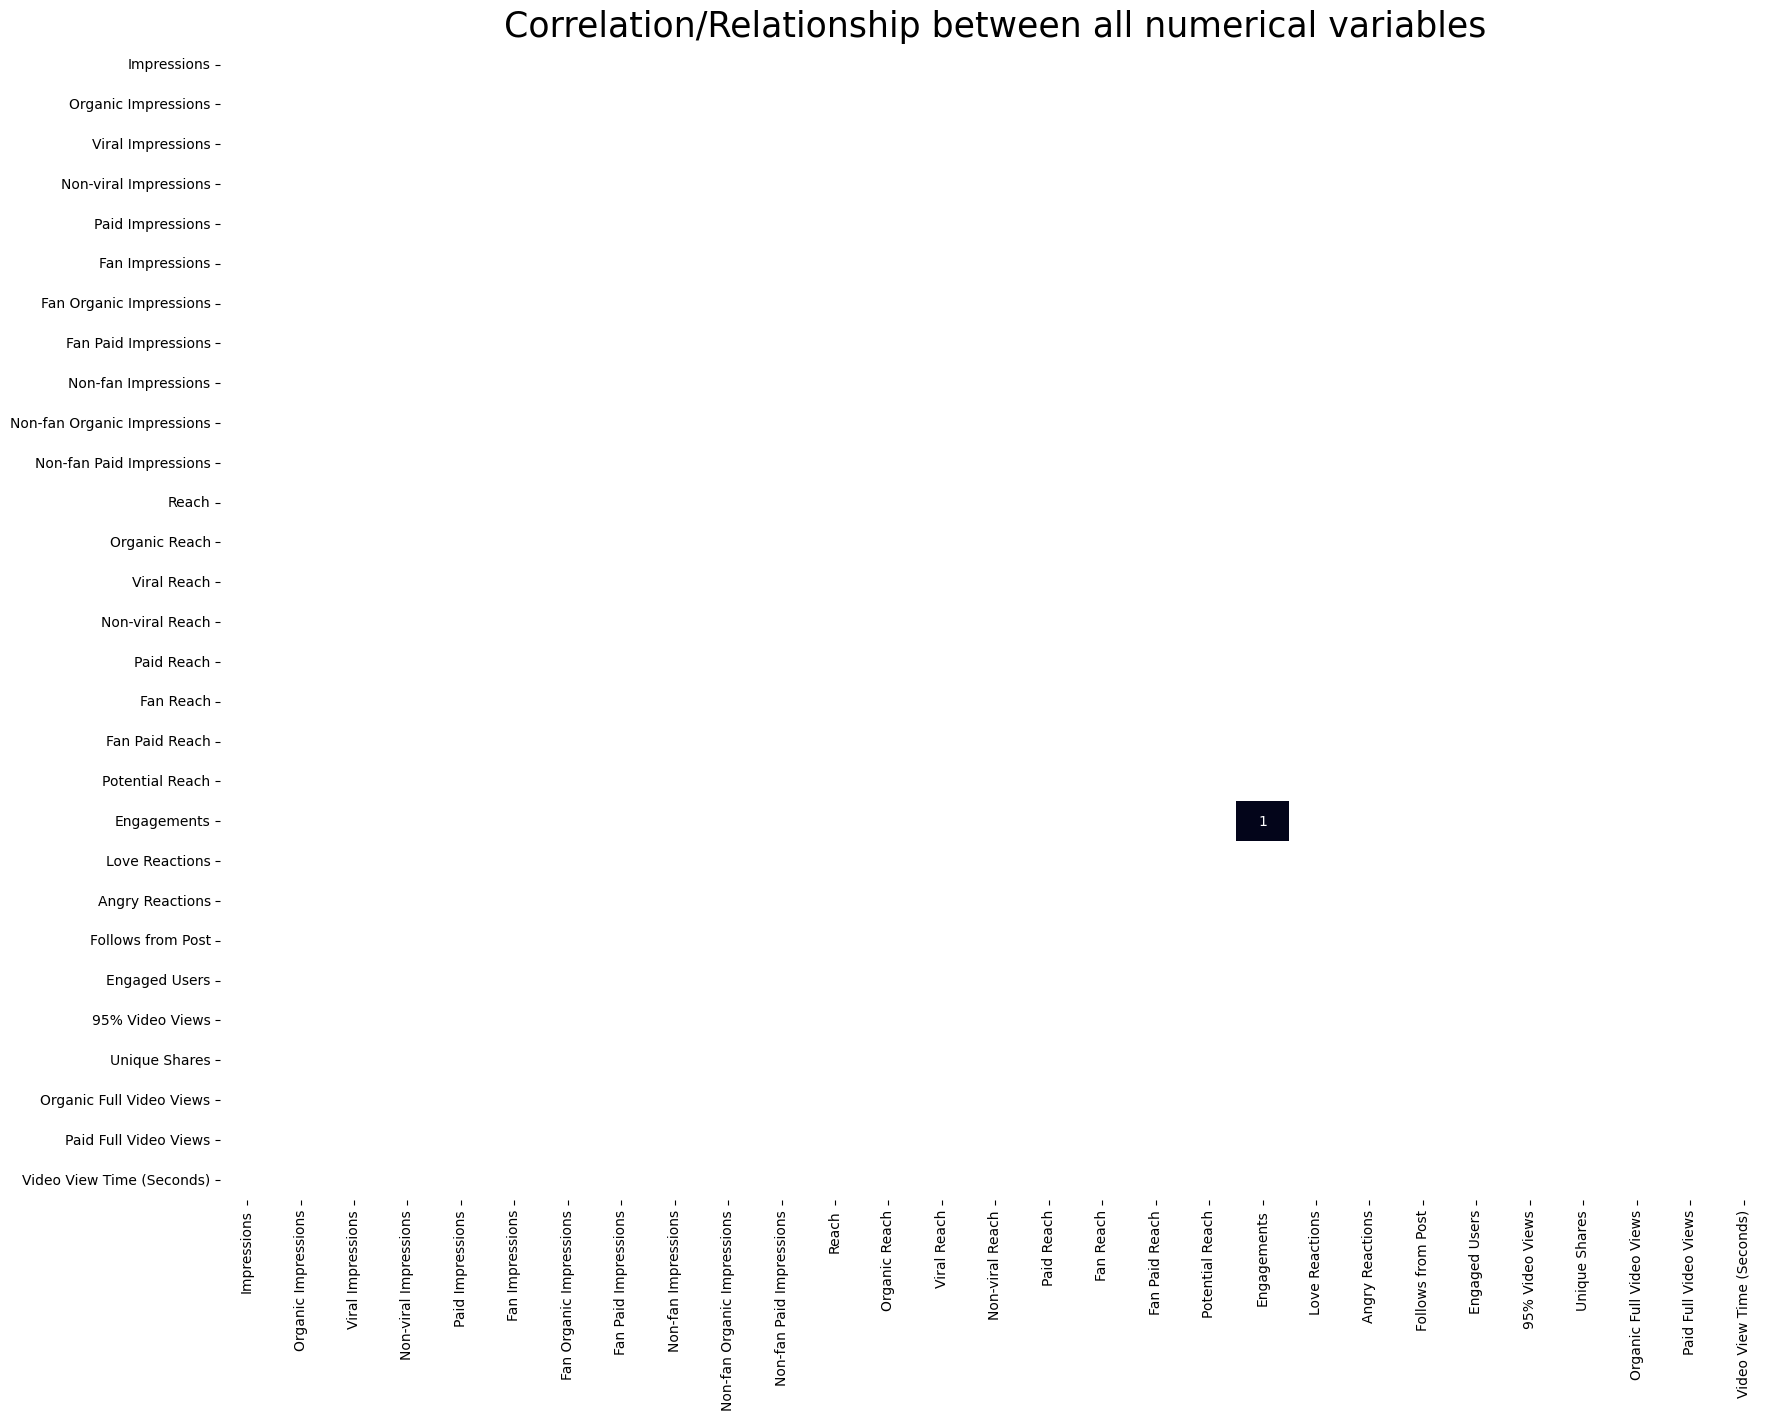

In [21]:
plt.figure(figsize=[20,15])
sns.heatmap(data=data.corr(), cbar=False, annot=True)
plt.title('Correlation/Relationship between all numerical variables', fontsize=25);

In [22]:
columns_with_multicollinearity=['Non-fan Impressions','Fan Impressions','Viral Impressions','Fan Reach',
                               'Engaged Users','95% Video Views']
data=data.drop(columns=['Non-fan Impressions','Fan Impressions','Viral Impressions','Fan Reach',
                               'Engaged Users','95% Video Views'],axis=1)

In [23]:
data.shape

(4833, 24)

In [24]:
data['Network']=data['Network'].replace({'Facebook':0,'Instagram':1,'LinkedIn':2,'Twitter':3})
data['Network']=data['Network'].astype('category')
data['Network'].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False)

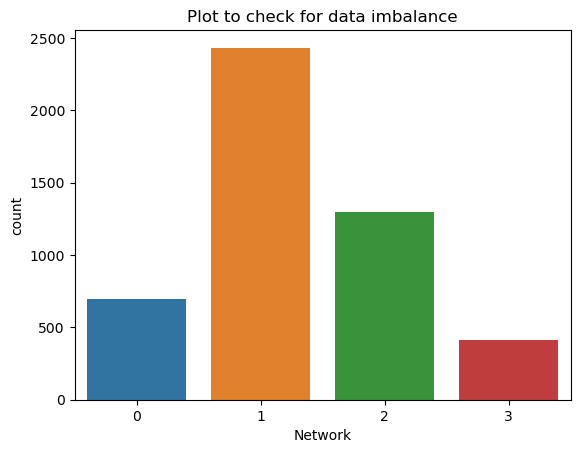

In [25]:
sns.countplot(data=data, x='Network')
plt.title('Plot to check for data imbalance');


from sklearn.utils import resample

# Create two different DataFrames for the majority and minority classes
df_majority = data[(data['Network'] == 1) | (data['Network'] == 2)]
df_minority = data[(data['Network'] == 0) | (data['Network'] == 3)]

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,         # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class
                                 random_state=42)      # Reproducible results

# Combine the majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])


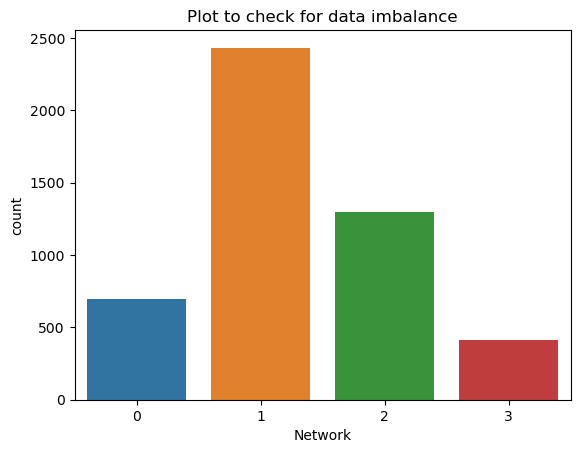

In [26]:
sns.countplot(data=data, x='Network')
plt.title('Plot to check for data imbalance');


<a name='4'></a>
## Modeling

In [27]:
x= data.drop(columns=['Network'],axis=1)
y= data['Network']

In [28]:
#Apply SMOTE to balance the dataset
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy='minority', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(x, y)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42, test_size=0.20, shuffle=True)

In [30]:
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [31]:
#use logistic regression
log_model=LogisticRegression()
log_model.fit(x_train_scaled, y_train)
log_prob= log_model.predict_proba(x_test_scaled)
log_pred= log_model.predict(x_test_scaled)

### Model evaluation of logistic regression model

In [32]:
#get the train and test score 
from sklearn.metrics import mean_squared_error
train_score= log_model.score(x_train_scaled, y_train)
test_score= log_model.score(x_test_scaled, y_test)
rmse= mean_squared_error(y_test, log_pred, squared=False)




print('train_score:', train_score)
print('test_score:', test_score)
print('_rmse:', rmse)


train_score: 0.42783238489394726
test_score: 0.39503619441571874
_rmse: 0.9219824869856095


In [33]:
#use confusion_matrix
cm= confusion_matrix(y_test, log_pred)
cr= classification_report(y_test, log_pred)
print(cm)

[[  0 157   0   0]
 [  0 382  83   0]
 [  0 266   0   0]
 [  0  79   0   0]]


C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#display the classification metrics using classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.43      0.82      0.57       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.40       967
   macro avg       0.11      0.21      0.14       967
weighted avg       0.21      0.40      0.27       967



In [35]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(967, 4)

In [36]:
#check the encoding of a class
print(label_binarizer.transform([1]))
print(label_binarizer.transform([0]))
print(label_binarizer.transform([2]))

[[0 1 0 0]]
[[1 0 0 0]]
[[0 0 1 0]]


In [37]:
#In the following plot we show the resulting ROC curve 
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id


2

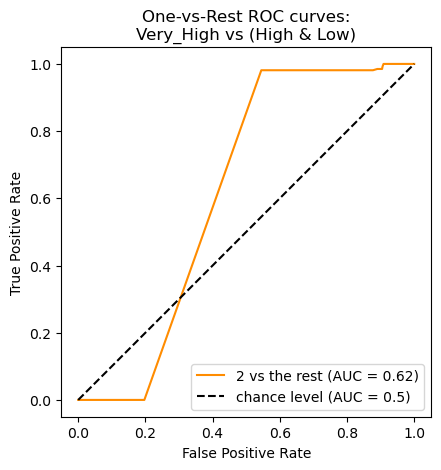

In [38]:
#create an roc curve to visually see how well the model performs at classification and prediction.

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
y_score= log_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVery_High vs (High & Low)")
plt.legend()
plt.show()

### Hyperparameter optimization for logistic regression model

In [39]:
#Perform GridsearchCV to tune best-fit LR model
from sklearn.model_selection import GridSearchCV
param = {'C': [10**-2, 10**-1, 10**0, 10**1,10**2]}

logistic_model= LogisticRegression(penalty='l1', solver='liblinear')

a_model=GridSearchCV(estimator=logistic_model, param_grid=param)

a_model.fit(x_train_scaled, y_train)

#Train a model with best parameters
real_model=LogisticRegression(**a_model.best_params_, penalty='l1', solver='liblinear')

real_model.fit(x_train_scaled, y_train)
y_predicted= real_model.predict(x_test_scaled)
prob1= real_model.predict_proba(x_test_scaled)[:,1]
prob2= real_model.predict_proba(x_test_scaled)

### DecisionTreeClassifier

In [40]:
#Build another model
tree= DecisionTreeClassifier()

tree.fit(x_train_scaled, y_train)

pred_3=tree.predict(x_test_scaled)

tree_prob= tree.predict_proba(x_test_scaled)



###  Model Evaluation

In [41]:
t_train_score= tree.score(x_train_scaled, y_train)
t_test_score= tree.score(x_test_scaled, y_test)
t_rmse= mean_squared_error(y_test, pred_3, squared=False)

print('t_train_score:', t_train_score)
print('t_test_score:', t_test_score)
print('t_rmse:', t_rmse)

t_train_score: 0.7589239524055872
t_test_score: 0.4808686659772492
t_rmse: 0.8741963364980656


In [42]:
classificationreport= classification_report(y_test, pred_3)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance tuning for Decision tree

In [43]:
class_tree= DecisionTreeClassifier( min_samples_split=50,criterion = 'gini',min_samples_leaf= 50,
                                                max_depth=10)

class_tree.fit(x_train_scaled, y_train)

y_pred=  class_tree.predict(x_test_scaled)

In [44]:
classificationreport= classification_report(y_test, y_pred)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Model

In [45]:
#Build another model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

rf.fit(x_train_scaled, y_train)

pred_4=rf.predict(x_test_scaled)

rf_prob= rf.predict_proba(x_test_scaled)



### Model Evalution

In [46]:
rf_train_score= rf.score(x_train_scaled, y_train)
rf_test_score= rf.score(x_test_scaled, y_test)
rf_rmse= mean_squared_error(y_test, pred_4, squared=False)

print('t_train_score:', rf_train_score)
print('t_test_score:', rf_test_score)
print('t_rmse:', rf_rmse)

t_train_score: 0.7589239524055872
t_test_score: 0.4808686659772492
t_rmse: 0.8741963364980656


In [47]:
classificationreport= classification_report(y_test, pred_4)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance Tuning

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=32, criterion='gini',min_samples_split=10,
                           max_samples=10, max_depth=10,max_features=10)
rf.fit(x_train, y_train)

#make predictions on validation set
rf_preds = rf.predict(x_test)

In [49]:
rf_preds=rf.predict(x_test_scaled)
classificationreport= classification_report(y_test, rf_preds)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

### XGboostclassifier

In [50]:
#Build another model
from xgboost import XGBClassifier 
xg= XGBClassifier()

xg.fit(x_train_scaled, y_train)

pred_5=xg.predict(x_test_scaled)

xg_prob= xg.predict_proba(x_test_scaled)



In [51]:
xg_train_score= xg.score(x_train_scaled, y_train)
xg_test_score= xg.score(x_test_scaled, y_test)
xg_rmse= mean_squared_error(y_test, pred_5, squared=False)

print('xg_train_score:', xg_train_score)
print('xg_test_score:', xg_test_score)
print('xg_rmse:', xg_rmse)

xg_train_score: 0.7589239524055872
xg_test_score: 0.4808686659772492
xg_rmse: 0.8741963364980656


In [52]:
classificationreport= classification_report(y_test, pred_5)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perfromance Tuning

In [53]:
xg = XGBClassifier(n_estimators=50, random_state=32, learning_rate=0.2,
                           max_depth=10,gamma=0.2,)

In [54]:
xg.fit(x_train_scaled,y_train)
pred_5=xg.predict(x_test_scaled)

In [55]:
classificationreport= classification_report(y_test, pred_5)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.48      1.00      0.65       465
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        79

    accuracy                           0.48       967
   macro avg       0.12      0.25      0.16       967
weighted avg       0.23      0.48      0.31       967



C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\512GB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


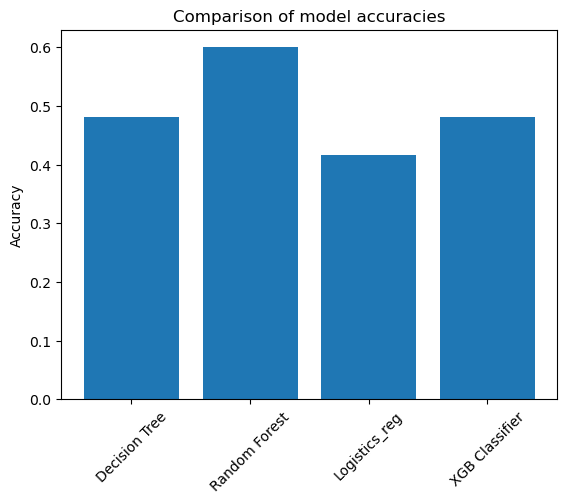

In [56]:
# Initialize the models
from sklearn.metrics import accuracy_score
models = [
    ('Decision Tree', class_tree),
    ('Random Forest', rf),
    ('Logistics_reg', real_model),
    ('XGB Classifier', xg)
]

# Train and evaluate the models
scores = []
for name, model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append((name, accuracy))

#bar chart to compare the accuracy of each model
names, scores = zip(*scores)
x = np.arange(len(names))
plt.bar(x, scores, align='center')
plt.xticks(x, names)
plt.ylabel('Accuracy')
plt.title('Comparison of model accuracies')
plt.xticks(rotation=45)
plt.show()